# How to Draw Ellipse of Covariance Matrix
Given a 2x2 covariance matrix, I explain how to draw the ellipse representing it. The following function explains the method to visualize multivariate normal distributions and correlation matrices. Formulae for radii & rotation are provided for covariance matrix shown below
\begin{align}
\Sigma = \begin{bmatrix} a & b \\ b & c \end{bmatrix}
\end{align}

## Radii and Rotation
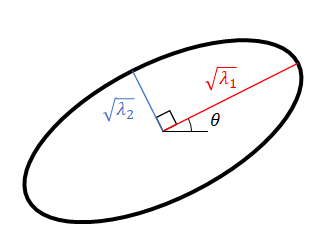
\begin{align}
\lambda_{1,2} &= \frac{a+c}{2} \pm \sqrt{\left( \frac{a-c}{2} \right)^{2} + b^{2}} \\
\theta &= \begin{cases} 0 & \text{ if } b = 0 \text{ and } a \geq c \\
 \frac{\pi}{2} & \text{ if } b = 0 \text{ and } a < c \\
 \text{atan2}(\lambda_{1} - a, b) & \text{ if } b \neq 0 
\end{cases}
\end{align}
Here, $\theta$ is the angle in radians from positive x-axis to the ellipse's major axis in the counterclockwise direction. $\sqrt{\lambda_{1}}$ is the radius of the major axis (the longer radius) and $\sqrt{\lambda_{2}}$ is the radius of the minor axis (shorter radius). In $atan2(\cdot, \cdot)$, the first parameter is $y$ and second is $x$.

In [59]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import block_diag
from scipy.special import erfinv
from scipy.stats import t as tdist
from numpy.linalg import inv
from numpy import linalg as LA
from matplotlib.patches import Ellipse

In [51]:
def GetAngleAndRadii(covar):
    """
    Given a covariance matrix, the function GetAngleAndRadii() calculates 
    the major axis and minor axis radii and the orientation of the ellipse.
    
    Inputs:
    covar: 2x2 matrix
    
    Output:
    major_radius: Radius of the major axis of ellipse
    minor_radius: Radius of the minor axis of ellipse
    theta       : Orientation angle in radians from positive x-axis
                  to the ellipse's major axis in the counterclockwise direction
    """
    
    # Infer the a,b,c values
    a = covar[0,0]
    b = covar[0,1]
    c = covar[1,1]
    
    if b > a:
        raise Exception("Sorry, covariance matrix is invalid - Cov[0,1] should be < Cov[0,0] ")
    
    lambda_1 = (a+c)/2 + math.sqrt(((a-c)/2)**2 + b**2)
    lambda_2 = (a+c)/2 - math.sqrt(((a-c)/2)**2 + b**2)
    
    # Infer the radii
    major_radius = math.sqrt(lambda_1)
    minor_radius = math.sqrt(lambda_2)
    
    # Infer the rotation
    if b == 0:
        if a >= c:
            theta = 0
        else:
            theta = pi/2
    else:
        theta = math.atan2(lambda_1-a, b)
    
    return major_radius, minor_radius, theta
    

In [8]:
# Check the above code
covar_check = np.array([[9,5],[5,4]])
major_radius_check, minor_radius_check, theta_check = GetAngleAndRadii(covar_check)
print('major axis radius = ', round(major_radius_check,2), 
      'minor axis radius = ', round(minor_radius_check,2), 
      'orientation = ', round(theta_check,2), 'rad')

major axis radius =  3.48 minor axis radius =  0.95 orientation =  0.55 rad


In [70]:
def plot_ellipse(center, cov = None):

    # Get the center of ellipse
    x_cent, y_cent = center
    
    print('center x at: ', x_cent)
    print('center y at: ', y_cent)
    
    # Get Ellipse Properties from cov matrix
    if cov is not None:
        major_radius, minor_radius, theta_orient = GetAngleAndRadii(cov)
        print('major axis radius = ', round(major_radius,2), 
              'minor axis radius = ', round(minor_radius,2), 
              'orientation = ', round(theta_orient,2), 'rad')
        eig_vec,eig_val,u = np.linalg.svd(cov)

    # Generate data for ellipse structure
    t    = np.linspace(0,2*np.pi,1000)
    x    = major_radius*np.cos(t)
    y    = minor_radius*np.sin(t)
    data = np.array([x,y])
    R    = np.array([[np.cos(theta_orient),-np.sin(theta_orient)],
                     [np.sin(theta_orient),np.cos(theta_orient)]])
    T    = np.dot(R,eig_vec)
    data = np.dot(T,data)
    
    # Center the ellipse at given center
    data[0] += x_cent
    data[1] += y_cent

    # Plot the ellipse
    fig,ax = plt.subplots()
    ax.plot(data[0],data[1],color='b',linestyle='-')
    ax.fill(data[0],data[1])

center x at:  1
center y at:  2
major axis radius =  3.32 minor axis radius =  1.0 orientation =  0.46 rad


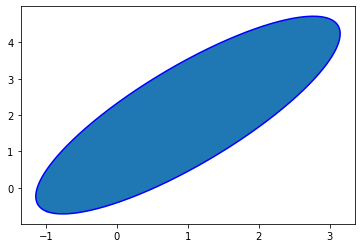

In [72]:
covar_check = np.array([[9,4],[4,3]])
plot_ellipse(center = (1,2), cov=covar_check)